In [7]:
!pip install scipy

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report
from Models.functions.utils import listProblems
from Models.functions.plot import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

ImportError: DLL load failed: Não foi possível encontrar o procedimento especificado.

In [ ]:
from pprint import pprint

In [306]:
reports = dict(
    baseline1 = '../baseline1/Reports_v2_balanced/',
    baseline2 = '../baseline2/Reports/',
    baseline3 = '../baseline3/Reports/',
    baseline3_1_1 = '../baseline3/Reports1.1/'
    baseline3_grid = '../baseline3/Reports_grid/'
)

In [247]:
import os

In [271]:
!ls {baseline3}'/gender/b5post'

confusion_matrix.csv	 histories_cnn1.pkl	   predicted.numpy.npy
confusion_matrix.npy	 histories.pkl		   predicted_proba.numpy.npy
confusion_matrix.pdf	 plot_training.pdf	   report.csv
expected_cnn1.numpy.npy  plot_validation.pdf	   ROC_curve_class_female.pdf
expected.numpy.npy	 predicted_cnn1.numpy.npy  score_cnn1.numpy.npy


In [321]:
def get_metrics(exp, pred): return f1_score(np.load(exp), np.load(pred), average="macro")
def get_metrics2(exp, pred): return f1_score(exp, pred, average="macro")
    
def get_baseline1(task, dataset_name, lang):    
    baseline1 = reports['baseline1']
    bar = '/' 
    lang2 = '_'+lang
    
    exp  = baseline1 + task +bar+ dataset_name +lang2+bar+'expected_y.numpy.npy'
    pred = baseline1 + task +bar+ dataset_name +lang2+bar+'predicted_y.numpy.npy'
    
    return get_metrics(exp, pred)

def get_baseline2(task, dataset_name, lang, v = 1):    
    baseline2 = reports['baseline2']
    bar = '/' 
    lang2 = '_'+lang if v == 1 else ''
    
    if os.path.exists(baseline2 + task +bar+ dataset_name +lang2+bar):
        exp  = baseline2 + task +bar+ dataset_name +lang2+bar+'expected.numpy.npy'
        pred = baseline2 + task +bar+ dataset_name +lang2+bar+'predicted_proba.numpy.npy'
    elif os.path.exists(baseline2 + task +bar+ dataset_name +bar):
        exp  = baseline2 + task +bar+ dataset_name +bar+'expected.numpy.npy'
        pred = baseline2 + task +bar+ dataset_name +bar+'predicted_proba.numpy.npy'
    else:
        exp  = '/tmp/'
        pred = '/tmp/'

    exp, pred = np.load(exp), np.load(pred)

    if type(pred[0]) != np.int64 and len(pred[0]) > 1:        
        pred = np.argmax(pred, axis=1)
    
    return get_metrics2(exp, pred)

def get_baseline3(task, dataset_name, lang):    
    baseline3 = reports['baseline3']
    bar = '/' 
    try:
        exp  = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        f1 = get_metrics(exp, pred)        
    except:
        f1 = 0
    
    return f1

def get_baseline3_1_1(task, dataset_name, lang):    
    baseline3 = reports['baseline3_1_1']
    bar = '/' 
    try:
        exp  = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        f1 = get_metrics(exp, pred)
    except:
        f1 = 0
    
    return f1

In [3]:
def check(dataset_name, task,v=1):
    """
    params: task
    return: dataframe
    """
    results = pd.DataFrame({'dataset': [], 'lang': [], 'task': [], 
                            'baseline1': [], 
                            'baseline2': [], 
                            'baseline3': [],'baseline3.1.1': [], 'baseline3_grid': []})
    
    for p in listProblems(filter_dataset_name = dataset_name, filter_task = task):
        bar = '/'
        task = p[0]
        dataset_name = p[1]
        lang = p[2]
        
        d = {
            'idx': dataset_name+'_'+task+'_'+lang,
            'dataset': dataset_name,
            'lang': lang,
            'task': task,
            'baseline1': get_baseline1(task, dataset_name, lang),
            'baseline2': get_baseline2(task, dataset_name, lang),
            'baseline3': get_baseline3(task, dataset_name, lang),
            'baseline3.1.1': get_baseline3_1_1(task, dataset_name, lang)
        }

        results = results.append(d, ignore_index=True)
        
    results = results.set_index('idx')
    return results

### b5post, brmoral, esic, pan13, enblog

,baseline1,baseline2,baseline3,baseline3.1.1,dataset,lang,task
idx,,,,,,,
b5post_gender_pt,0.866651,0.625177,0.533351,0.589603,b5post,pt,gender
b5post_age_pt,0.576645,0.490736,0.368482,0.343504,b5post,pt,age
b5post_religion_pt,0.443835,0.425869,0.394232,0.289555,b5post,pt,religion
b5post_it_pt,0.679319,0.592385,0.535493,0.480490,b5post,pt,it


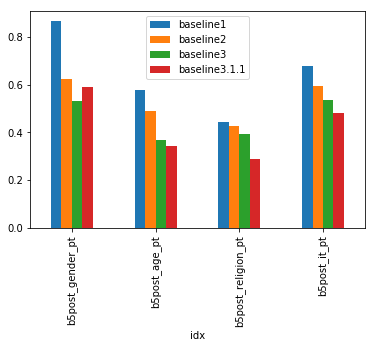

In [337]:
df = check('b5post',None,v=1)
df.plot(kind='bar')
display(df)

In [6]:
df = check('brmoral',None)
df.plot(kind='bar')#, figsize=(5,5))
display(df)

NameError: name 'listProblems' is not defined

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    baseline1  baseline2  baseline3 dataset lang        task
idx                                                                         
esic_gender_pt       0.366509   0.576841   0.502885    esic   pt      gender
esic_age_pt          0.580887   0.435316   0.399177    esic   pt         age
esic_education_pt    0.578778   0.472374   0.435546    esic   pt   education
esic_profession_pt   0.533206   0.372463   0.322516    esic   pt  profession
esic_region_pt       0.604788   0.277929   0.148619    esic   pt      region
esic_city_pt         0.705607   0.574884   0.576721    esic   pt        city


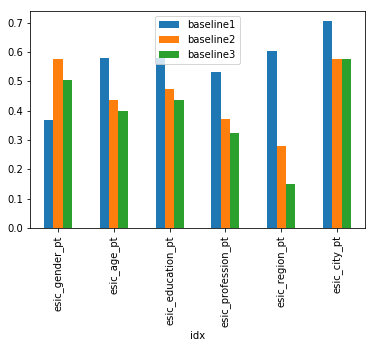

In [295]:
df = check('esic',None)
df.plot(kind='bar')
print(df)

                  baseline1  baseline2  baseline3 dataset lang    task
idx                                                                   
enblog_gender_en   0.741315   0.756816   0.734750  enblog   en  gender
enblog_age_en      0.715083   0.728921   0.590814  enblog   en     age


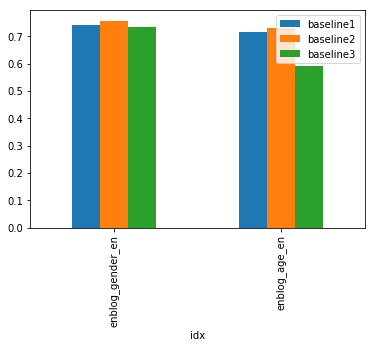

In [296]:
df = check('enblog',None,v=1)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
print(df)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,baseline1,baseline2,baseline3,baseline3.1.1,dataset,lang,task
idx,,,,,,,
pan13_gender_en,0.575037,0.552429,0.536396,0.0,pan13,en,gender
pan13_gender_es,0.631629,0.558898,0.535736,0.0,pan13,es,gender
pan13_age_en,0.504853,0.558206,0.395088,0.0,pan13,en,age
pan13_age_es,0.554949,0.544507,0.384822,0.0,pan13,es,age


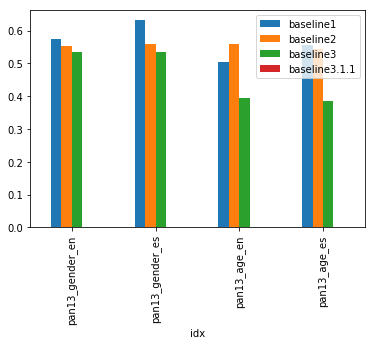

In [326]:
df = check('pan13',None,v=1)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
display(df)

In [71]:
from Models.functions.datasets import loadTrainTest
from sklearn.model_selection import StratifiedKFold